In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn import svm

from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_absolute_error

import random



In [ ]:
# load the dataset
def load_dataset(filename, numbases):
	# load the dataset as a pandas DataFrame
	data = pd.read_csv(filename)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, 1+numbases:81]
	y = dataset[:, 81]
	# format all fields as string
	X = X.astype(str)
	# reshape target to be a 2d array
	y = y.reshape((len(y), 1))
	return X, y


In [ ]:
#encodes input data
def prepare_inputs(X_train, X_test):
	ohe = OneHotEncoder()
	ohe.fit(X_train)
	X_train_enc = ohe.transform(X_train)
	X_test_enc = ohe.transform(X_test)
	return X_train_enc, X_test_enc

#used to prepare a single set of input data
def prepare_X(X, X_train):
	ohe = OneHotEncoder()
	ohe.fit(X_train)
	X = ohe.transform(X)
	return X

#encodes target data
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [ ]:
import random

def permuteFeature(data, col):
  copyData = np.copy(data)
  baseList = []
  for i in range(copyData.shape[0]):
    baseList.append(copyData[i][col])

  permutedList = []
  for i in range(len(baseList)):
    pos = random.randint(0,(len(baseList)-1))
    permutedList.append(baseList.pop(pos))

  for i in range(len(permutedList)):
    copyData[i][col] = permutedList[i]

  return copyData

In [ ]:
def plotPermAnalysis(X_train, X_test, y_train, y_test, RorL):

    importanceList = [0 for i in range(len(X_test[1]))]

    #prepare inputs,targets
    X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
    y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

    #creates model using optimized hyperparameters
    model = svm.SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
                    kernel='rbf', max_iter=-1, probability=False,
                    random_state=None, shrinking=True, tol=0.001, verbose=False)

    #fits model and predicts using non-permuted data to establish baseline accuracy score
    model.fit(X_train_enc, y_train_enc)
    y_pred = model.predict(X_test_enc)

    max_acc = accuracy_score(y_pred, y_test_enc)

    #permutes each feature in X_test and finds change in accuracy
    for i in range(len(X_test[1])):
      thisX_test = None
      thisX_test = permuteFeature(X_test,i)

      thisX_test_enc = prepare_X(thisX_test, X_train)

      y_pred = model.predict(thisX_test_enc)

      this_acc = accuracy_score(y_pred, y_test_enc)

      importanceList[i] = max_acc - this_acc

    #plots the importance for each feature on scatter plot
    x = [i for i in range(1,81)]
    y = importanceList

    plt.scatter(x,y)
    plt.xlabel("Position in Sequence")
    plt.ylabel("Importance")
    plt.title("Permutation analysis using SVC -- " + RorL + " Flanks")
    plt.savefig(RorL + 'permAnalysisSVC', dpi=600)
    plt.show

    return importanceList

Train (251, 80) (251, 1)
Test (63, 80) (63, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[-0.015873015873015817,
 0.015873015873015928,
 0.0,
 -0.015873015873015817,
 0.0,
 -0.015873015873015817,
 0.0,
 0.0,
 0.0,
 -0.015873015873015817,
 -0.015873015873015817,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.015873015873015817,
 0.0,
 -0.015873015873015817,
 -0.031746031746031744,
 0.0,
 0.0,
 -0.031746031746031744,
 -0.015873015873015817,
 -0.015873015873015817,
 -0.015873015873015817,
 0.0,
 -0.015873015873015817,
 -0.015873015873015817,
 0.0,
 0.0,
 -0.015873015873015817,
 -0.015873015873015817,
 -0.015873015873015817,
 -0.015873015873015817,
 0.0,
 -0.015873015873015817,
 -0.015873015873015817,
 -0.015873015873015817,
 -0.015873015873015817,
 0.0,
 -0.015873015873015817,
 -0.015873015873015817,
 -0.031746031746031744,
 -0.015873015873015817,
 -0.015873015873015817,
 0.0,
 -0.015873015873015817,
 -0.015873015873015817,
 -0.031746031746031744,
 -0.031746031746031744,
 -0.031746031746031744,
 -0.015873015873015817,
 0.0,
 -0.031746031746031744,
 0.0,
 0.0,
 -0.015873015873015817,

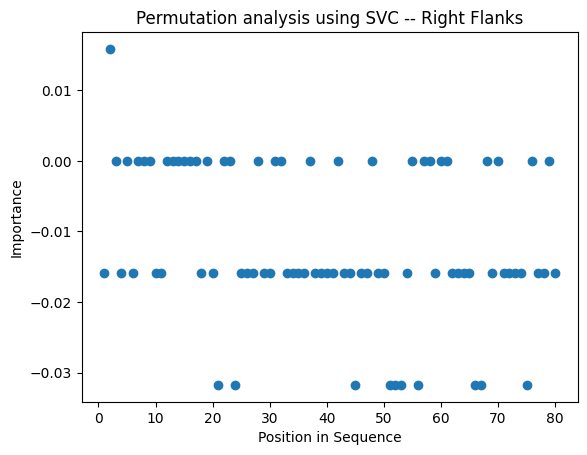

In [ ]:
# load the dataset
X, y = load_dataset('agroRight.csv', 0)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

plotPermAnalysis(X_train, X_test, y_train, y_test, "Right")

Train (390, 80) (390, 1)
Test (98, 80) (98, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[0.010204081632653073,
 -0.010204081632653073,
 0.0,
 0.020408163265306145,
 0.010204081632653073,
 -0.010204081632653073,
 0.04081632653061229,
 -0.020408163265306034,
 -0.010204081632653073,
 0.020408163265306145,
 -0.020408163265306034,
 0.010204081632653073,
 0.0,
 0.010204081632653073,
 0.030612244897959218,
 0.0,
 0.010204081632653073,
 0.010204081632653073,
 0.010204081632653073,
 0.04081632653061229,
 0.020408163265306145,
 0.0,
 0.04081632653061229,
 0.0,
 0.020408163265306145,
 0.020408163265306145,
 0.0,
 0.020408163265306145,
 0.010204081632653073,
 0.010204081632653073,
 0.020408163265306145,
 0.030612244897959218,
 0.020408163265306145,
 0.0,
 0.0,
 -0.020408163265306034,
 0.0,
 0.04081632653061229,
 0.05102040816326536,
 0.010204081632653073,
 0.010204081632653073,
 0.010204081632653073,
 0.010204081632653073,
 0.010204081632653073,
 0.010204081632653073,
 0.0,
 0.020408163265306145,
 0.020408163265306145,
 0.05102040816326536,
 0.030612244897959218,
 0.03061224489795921

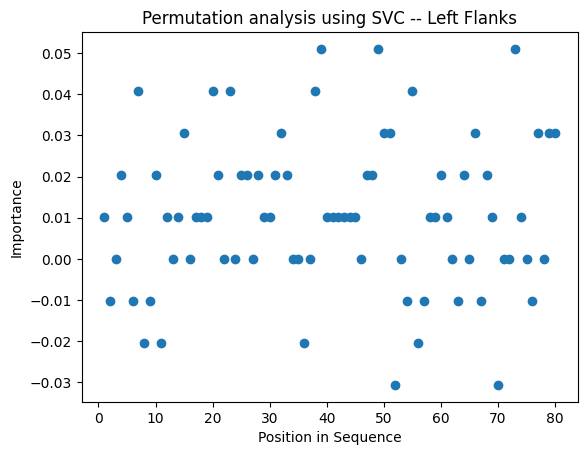

In [ ]:
# load the dataset
X, y = load_dataset('agroLeft.csv', 0)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

plotPermAnalysis(X_train, X_test, y_train, y_test, "Left")